In [3]:
import time
import warnings
from itertools import cycle, islice


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import cluster, datasets
import scipy.cluster.hierarchy as shc


AMOSTRAS = 2000

np.random.seed(12)

circulos,_ = datasets.make_circles(n_samples=AMOSTRAS, factor=.4,noise=.07, random_state= 12)

bolinhas,_ = datasets.make_blobs(n_samples=AMOSTRAS, random_state=15)

aleatorio = np.random.rand(AMOSTRAS, 2)

X_aux, y_aux = datasets.make_blobs(n_samples=AMOSTRAS, random_state=42)
transf = [[0.6, -0.6], [-0.4, 0.8]]
aniso = np.dot(X_aux, transf)

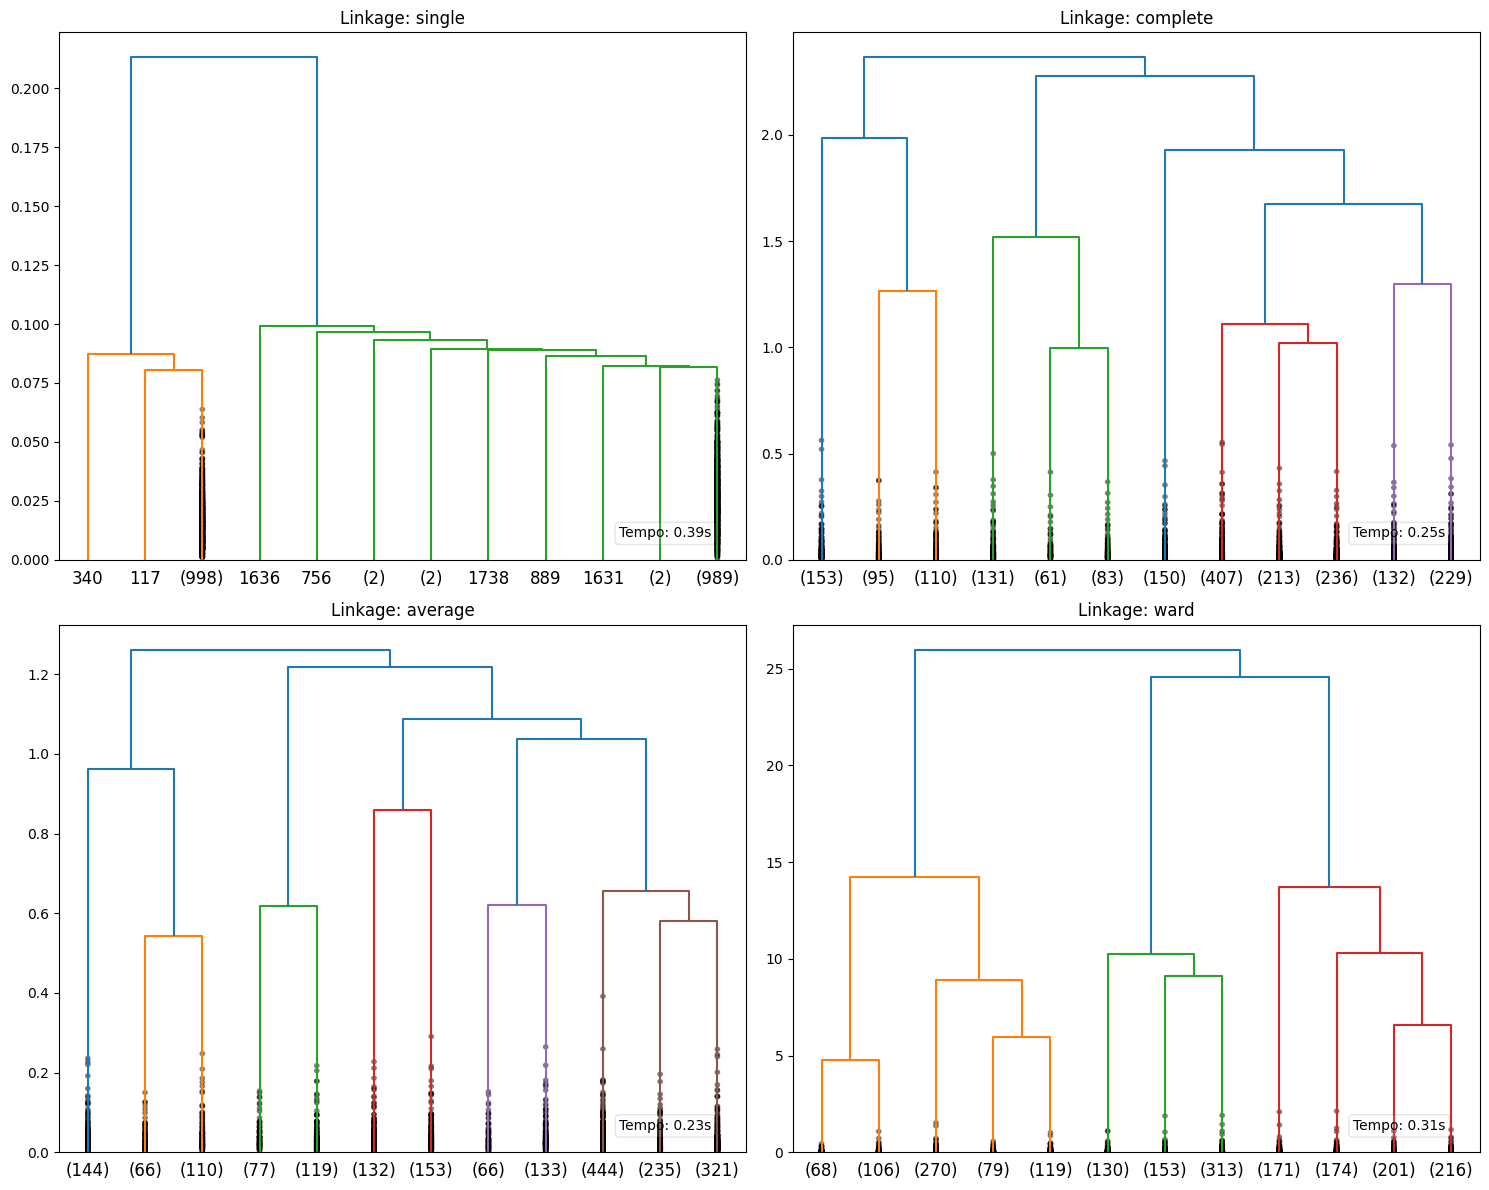

In [13]:
def compara_linkage(dataset, n_clust=2):
    # Tipos de linkage a serem comparados
    linkages = ['single', 'complete', 'average', 'ward']
    
    # Configurações para os subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, linkage in enumerate(linkages):
        start_time = time.time()
        
        # Cria o modelo de clustering hierárquico
        hc = shc.linkage(dataset, method=linkage)
        
        # Plota o dendrograma
        shc.dendrogram(hc, ax=axes[i], truncate_mode='lastp', p=12, show_contracted=True)
        axes[i].set_title(f'Linkage: {linkage}')
        
        # Ajusta a visualização do tempo de execução
        execution_time = time.time() - start_time
        axes[i].text(0.95, 0.05, f'Tempo: {execution_time:.2f}s', ha='right', va='center', 
                     transform=axes[i].transAxes, fontsize=10, bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))
    
    plt.tight_layout()
    plt.show()

# Exemplo de uso com os dados 'circulos'
compara_linkage(circulos, n_clust=2)


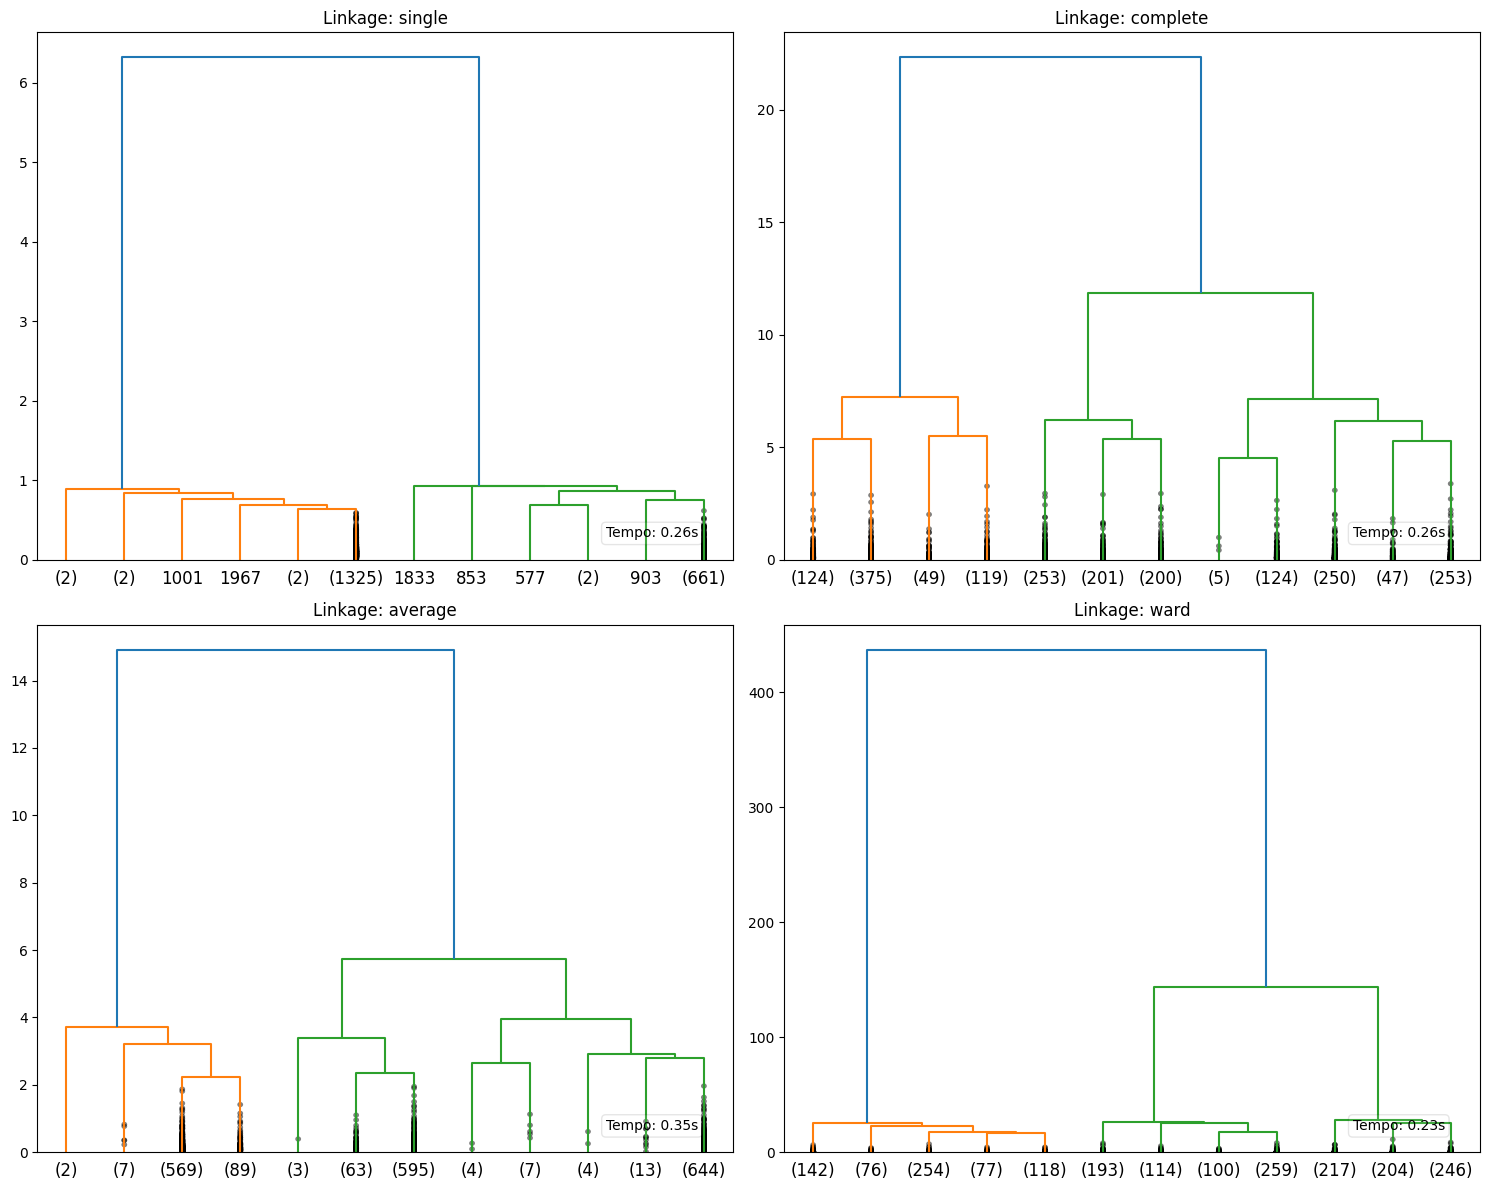

In [14]:
compara_linkage(bolinhas, n_clust=3)

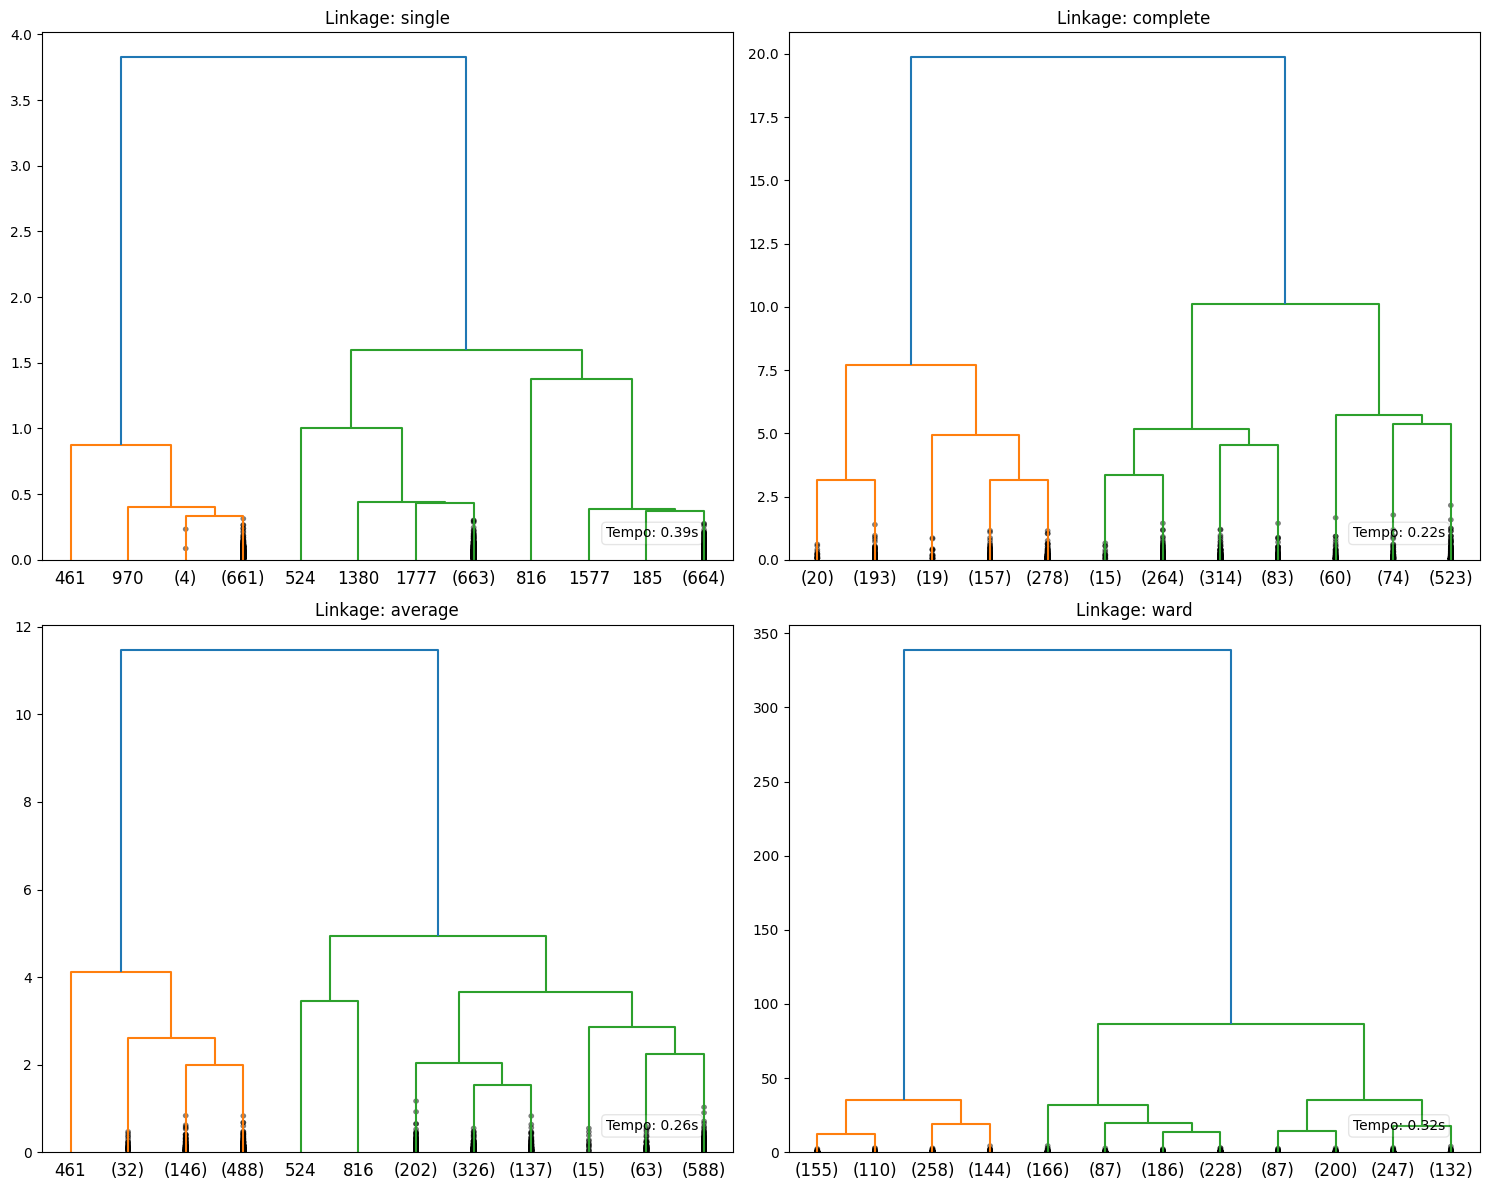

In [15]:
compara_linkage(aniso, n_clust=3)

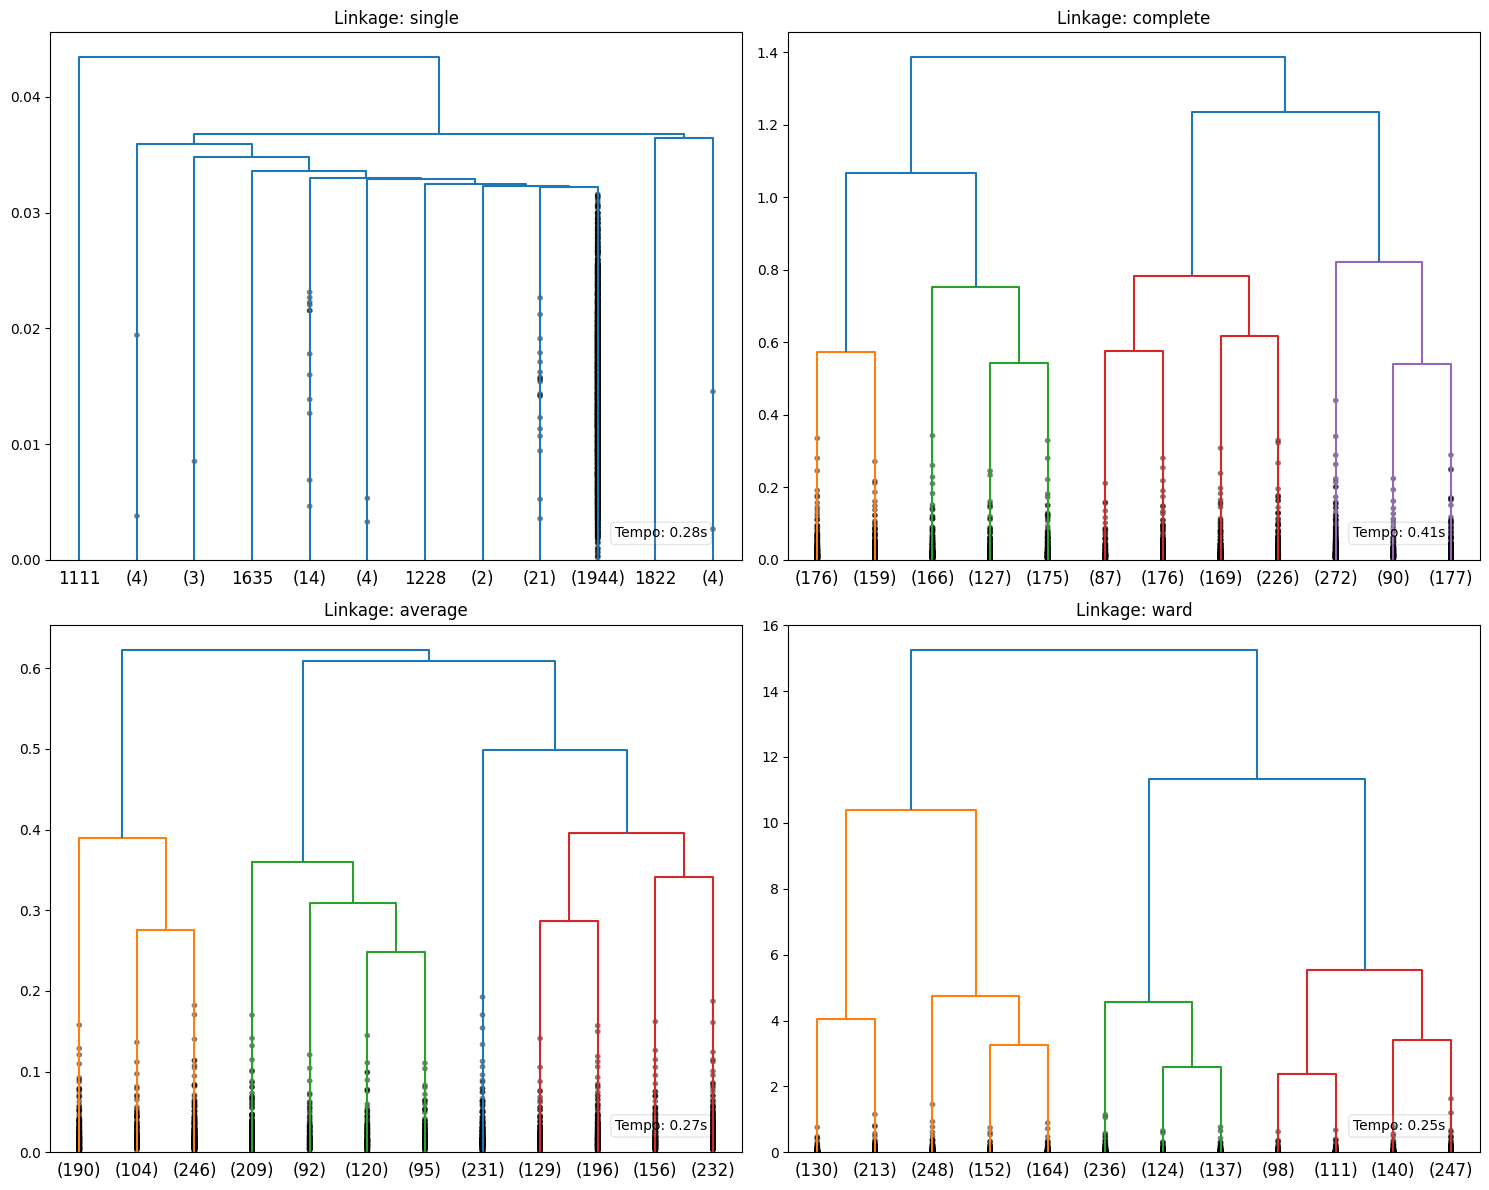

In [16]:
compara_linkage(aleatorio, n_clust=3)

In [17]:
bolinhas_peq,_ = datasets.make_blobs(n_samples=50, random_state=10,  centers = [(-5,-4), (-2,2) , (2.5, -6), (3, 4)])

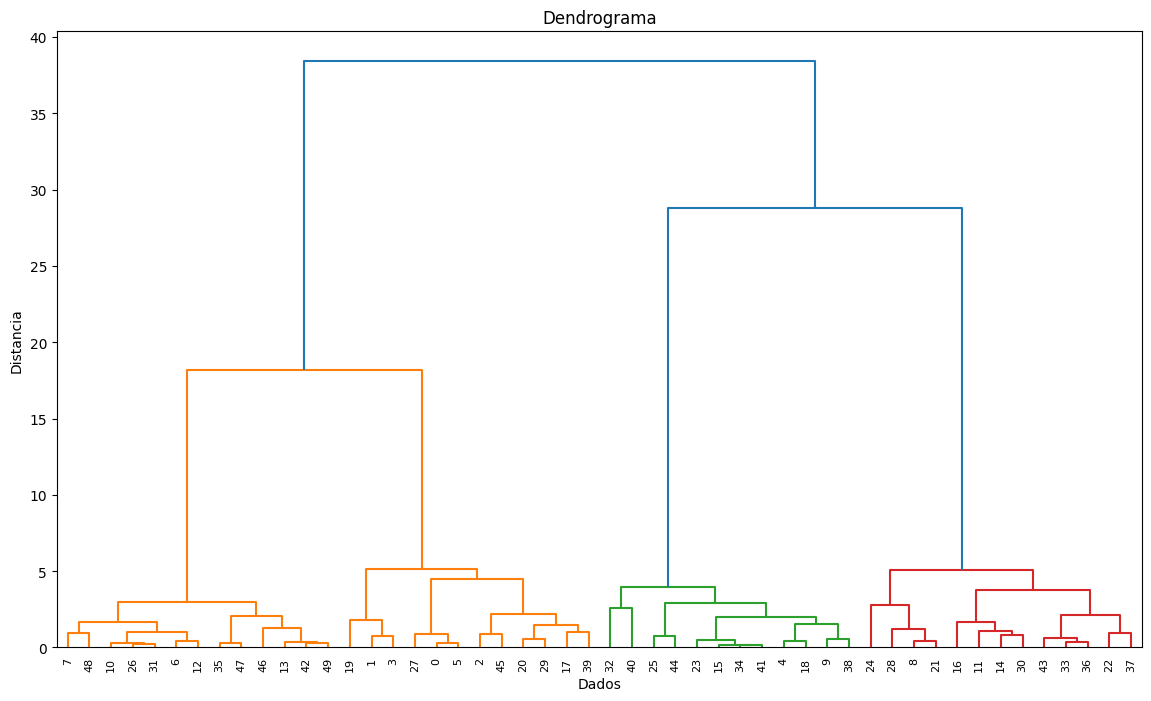

In [18]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(14, 8))  
plt.title("Dendrograma")  
plt.xlabel('Dados')
plt.ylabel('Distancia')

dend = shc.dendrogram(shc.linkage(bolinhas_peq, method='ward'))

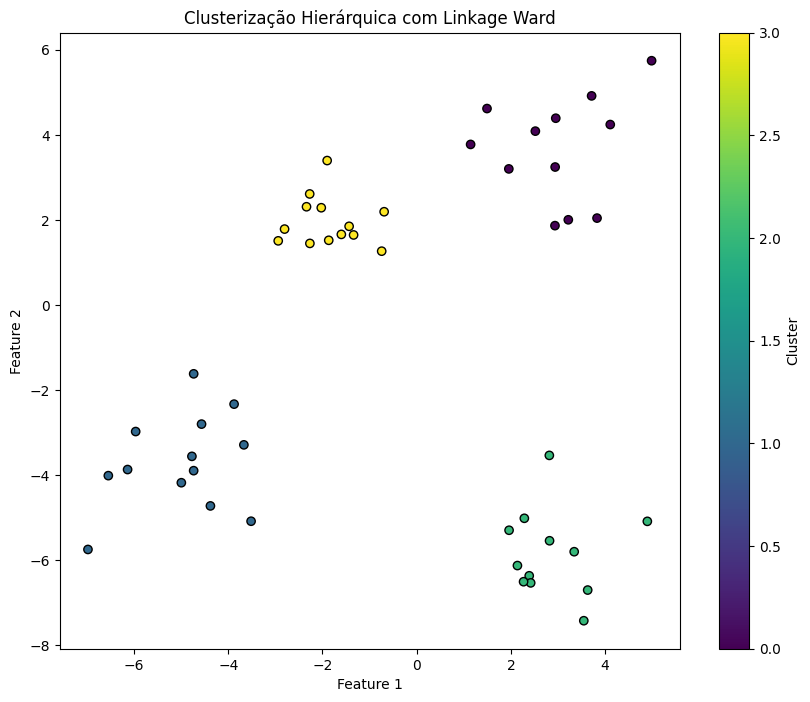

In [21]:
from sklearn.cluster import AgglomerativeClustering

# Definir o modelo de clusterização hierárquica
modelo = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Ajustar o modelo aos dados
labels = modelo.fit_predict(bolinhas_peq)

# Plotar os pontos com cores baseadas nos rótulos dos clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(bolinhas_peq[:, 0], bolinhas_peq[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Cluster')
plt.title('Clusterização Hierárquica com Linkage Ward')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


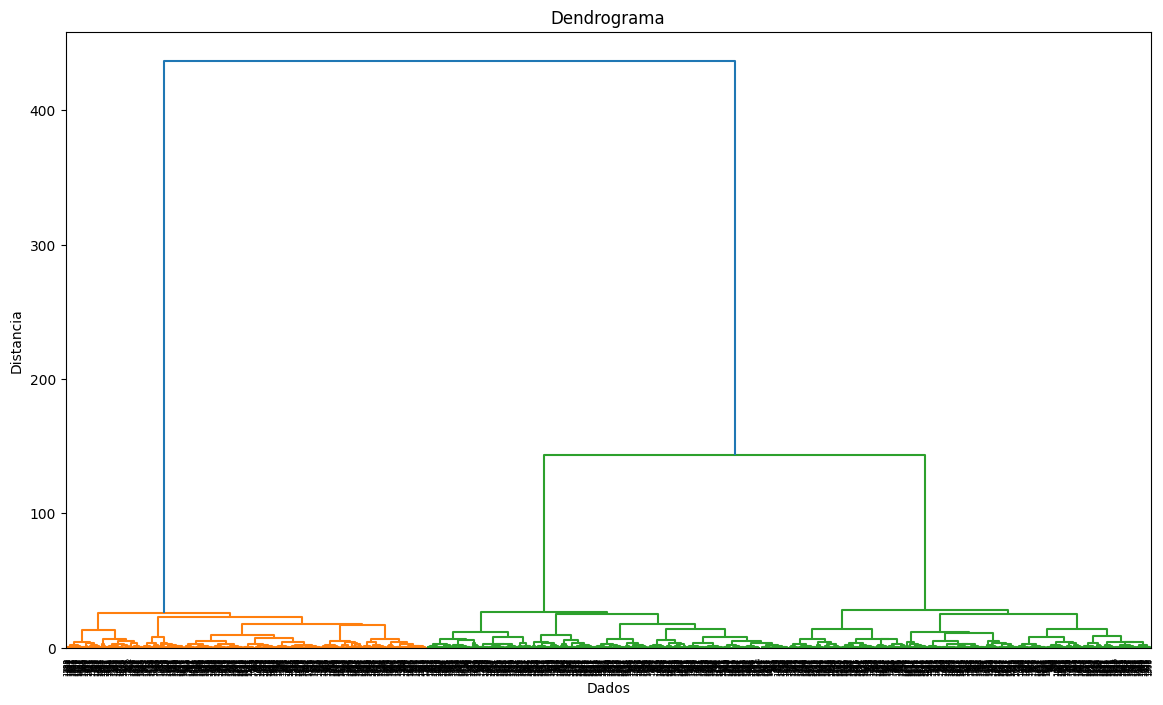

In [23]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(14, 8))  
plt.title("Dendrograma")  
plt.xlabel('Dados')
plt.ylabel('Distancia')

dend = shc.dendrogram(shc.linkage(bolinhas, method='ward'))

In [24]:
# Número de observações
n_observacoes = 2000

# Calcular a raiz quadrada
num_clusters = int(np.sqrt(n_observacoes))

# Limitar o número máximo de clusters a 200 (não necessário neste caso)
num_clusters = min(num_clusters, 200)

print(f"Número de clusters a ser utilizado: {num_clusters}")


Número de clusters a ser utilizado: 44


In [25]:
from sklearn.cluster import KMeans

# Definir e ajustar o modelo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=5)
kmeans.fit(bolinhas)

# Obter o valor da inércia
inercia = kmeans.inertia_

print(f"Valor da inércia: {inercia:.2f}")


Valor da inércia: 437.02


c:\Users\mari_\OneDrive\Documentos\Cientista de Dados\Clusterização Hierarquica\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mari_\OneDrive\Documentos\Cientista de Dados\Clusterização Hierarquica\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


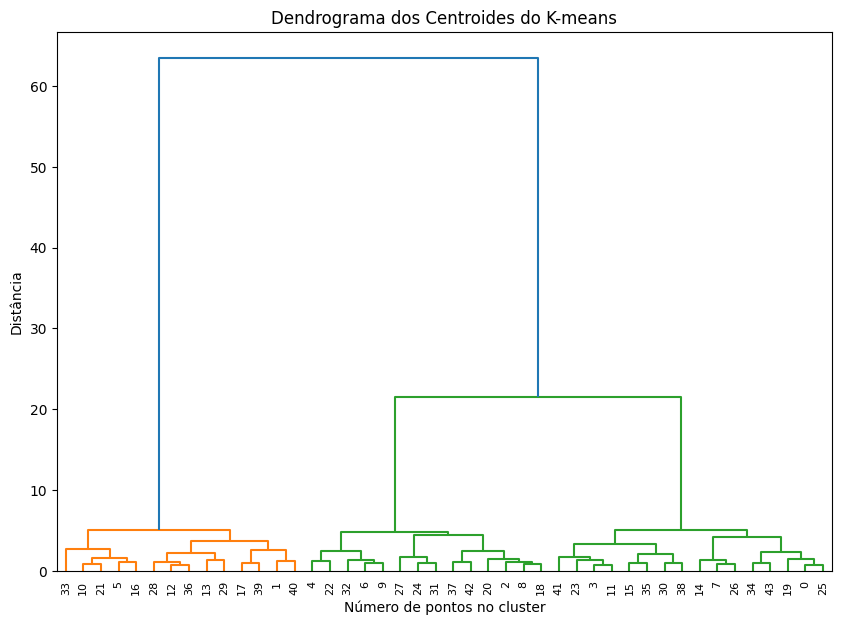

In [26]:
# Obter os centroides
centroides = kmeans.cluster_centers_

# Aplicar clusterização hierárquica aos centroides
hc = shc.linkage(centroides, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(10, 7))
shc.dendrogram(hc, truncate_mode='lastp', p=num_clusters, show_contracted=True)
plt.title('Dendrograma dos Centroides do K-means')
plt.xlabel('Número de pontos no cluster')
plt.ylabel('Distância')
plt.show()

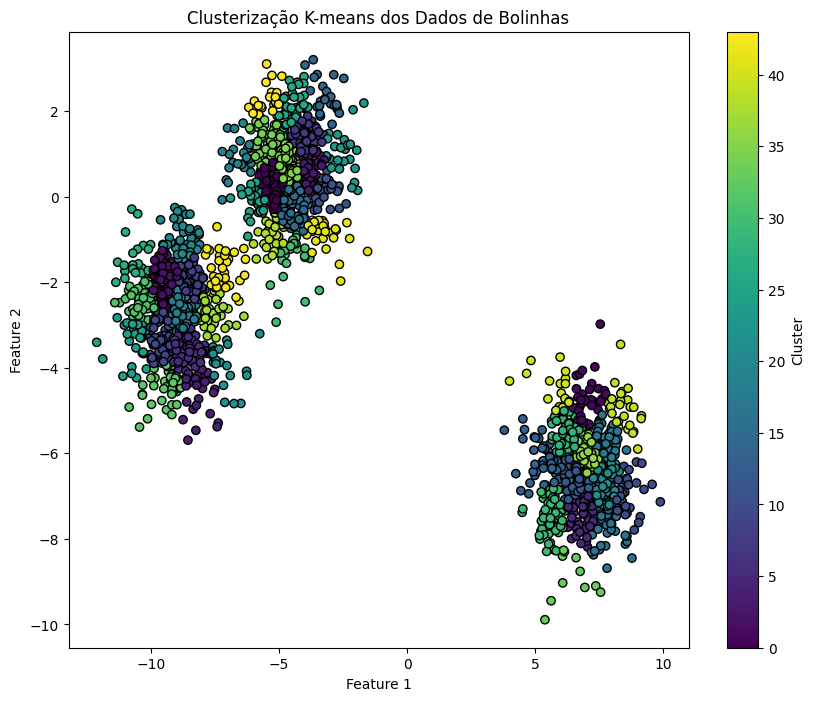

In [27]:
# Obter os rótulos dos clusters
labels = kmeans.labels_

# Plotar os dados de bolinhas coloridos pelos clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(bolinhas[:, 0], bolinhas[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Cluster')
plt.title('Clusterização K-means dos Dados de Bolinhas')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

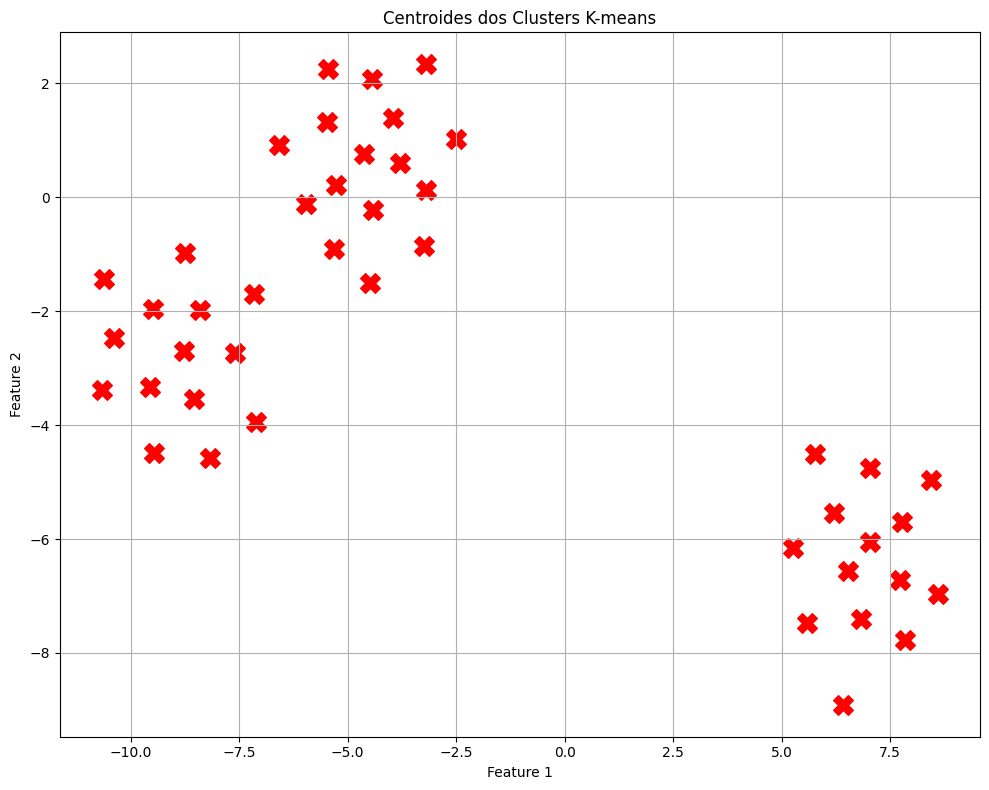

In [31]:
# Plotar os centroides
plt.figure(figsize=(10, 8))
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, marker='X')  # Centroides em vermelho com X
plt.title('Centroides dos Clusters K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.tight_layout()
plt.show()

In [39]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# Aplicar a clusterização hierárquica aos centroides
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_labels = hc.fit_predict(centroides)

# Contar a ocorrência de cada rótulo para os centroides
unique, counts = np.unique(hc_labels, return_counts=True)
centroid_counts = dict(zip(unique, counts))

# Identificar o cluster com a maior quantidade de dados
cluster_com_maior_quantidade = max(centroid_counts, key=centroid_counts.get)
quantidade_centroides = centroid_counts[cluster_com_maior_quantidade]

print(f"Número de centroides no cluster com a maior quantidade de dados: {quantidade_centroides}")


Número de centroides no cluster com a maior quantidade de dados: 16


In [53]:
df_bolinhas = pd.DataFrame(bolinhas, columns = ['feature1','feature2'])

df_bolinhas['kmeans_cluster'] = kmeans.labels_

# criando o mapeamento entre os clusters
mapeamento_kmeans_hierarquico = {key:value for key,value in enumerate(hc.labels_)}
# mapeando os clusters do k-means para os clusters da clusterização hierarquica
df_bolinhas['hierarquico_clusters'] = df_bolinhas['kmeans_cluster'].map(mapeamento_kmeans_hierarquico)

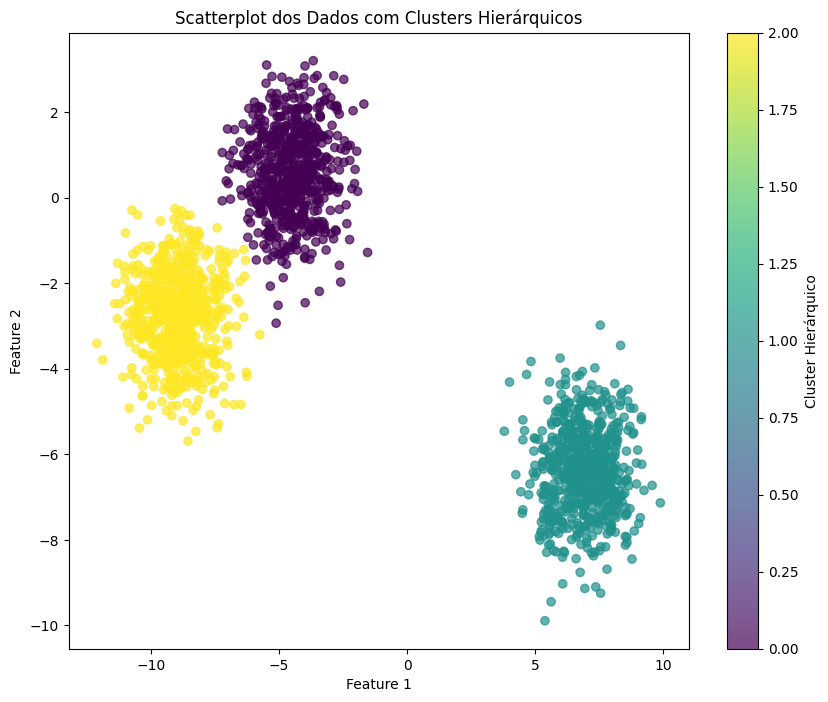

In [54]:
# Criar o scatterplot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_bolinhas['feature1'], df_bolinhas['feature2'], 
                      c=df_bolinhas['hierarquico_clusters'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster Hierárquico')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot dos Dados com Clusters Hierárquicos')
plt.show()


In [70]:
from sklearn import datasets

iris = datasets.load_iris()

df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris['Especie'] = iris.target
df_iris['Nome Especie'] = df_iris['Especie'].map({k:v for k,v in enumerate(iris.target_names)})

In [71]:
# Contar o número de amostras para cada espécie
contagem_especies = df_iris['Nome Especie'].value_counts()

print(contagem_especies)

Nome Especie
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


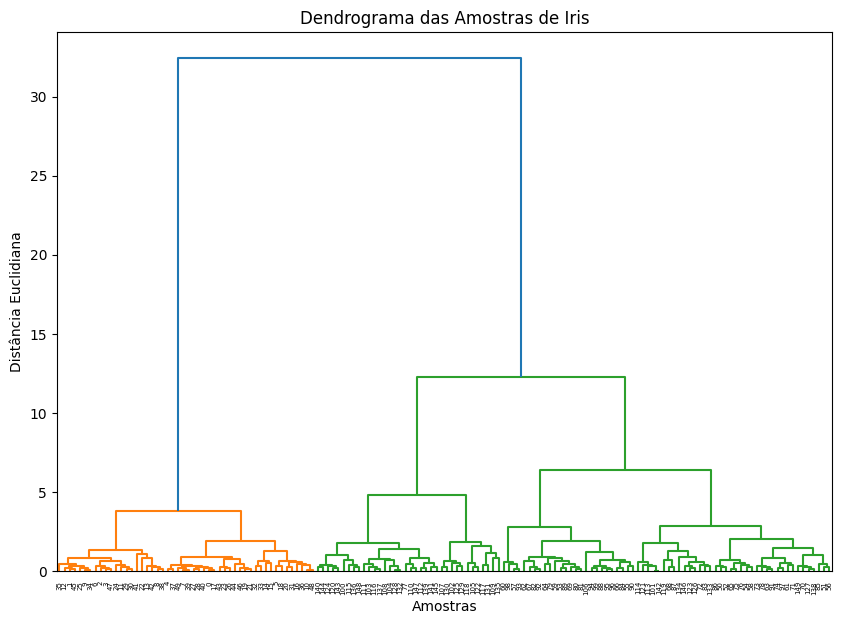

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn import datasets

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
# Não utilizaremos a coluna de rótulos para o dendrograma

# Calcular a matriz de distância e o linkage
plt.figure(figsize=(10, 7))
dendrogram = shc.dendrogram(shc.linkage(df_iris, method='ward'))

# Configurar o gráfico
plt.title('Dendrograma das Amostras de Iris')
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.show()


In [76]:
# Definir o modelo de clusterização hierárquica com 3 clusters
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Ajustar o modelo aos dados
df_iris['cluster'] = hc.fit_predict(df_iris)

# Contar o número de elementos em cada cluster
cluster_counts = df_iris['cluster'].value_counts()

# Exibir os resultados
print("Número de elementos em cada cluster:")
print(cluster_counts)

Número de elementos em cada cluster:
cluster
0    64
1    50
2    36
Name: count, dtype: int64


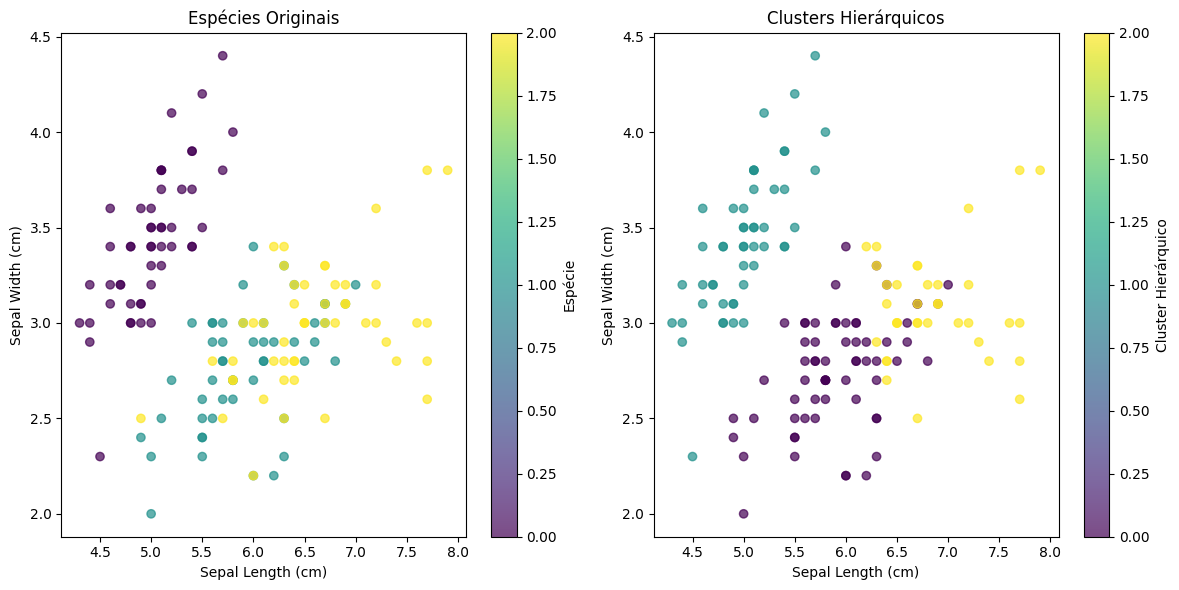

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['Especie'] = iris.target
df_iris['Nome Especie'] = df_iris['Especie'].map({k: v for k, v in enumerate(iris.target_names)})

# Definir o modelo de clusterização hierárquica com 3 clusters
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Ajustar o modelo aos dados
df_iris['hc_cluster'] = hc.fit_predict(df_iris[iris.feature_names])

# Criar o primeiro scatterplot com os rótulos originais das espécies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_iris['sepal length (cm)'], df_iris['sepal width (cm)'], c=df_iris['Especie'], cmap='viridis', alpha=0.7)
plt.title('Espécies Originais')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Espécie')

# Criar o segundo scatterplot com os clusters da clusterização hierárquica
plt.subplot(1, 2, 2)
plt.scatter(df_iris['sepal length (cm)'], df_iris['sepal width (cm)'], c=df_iris['hc_cluster'], cmap='viridis', alpha=0.7)
plt.title('Clusters Hierárquicos')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Cluster Hierárquico')

plt.tight_layout()
plt.show()
